In [1]:
#import QSO catalog
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
hdul = fits.open("QSO_cat_iron_cumulative_v0.fits")
table = hdul[1].data
print(table.columns.names)

['TARGETID', 'Z', 'ZERR', 'ZWARN', 'LOCATION', 'COADD_FIBERSTATUS', 'TARGET_RA', 'TARGET_DEC', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2', 'PROBA_RF', 'FLUX_IVAR_W2', 'MASKBITS', 'CMX_TARGET', 'DESI_TARGET', 'COADD_NUMEXP', 'COADD_EXPTIME', 'SV1_DESI_TARGET', 'SV2_DESI_TARGET', 'SV3_DESI_TARGET', 'SV1_SCND_TARGET', 'SV2_SCND_TARGET', 'SV3_SCND_TARGET', 'SCND_TARGET', 'TSNR2_LYA', 'TSNR2_QSO', 'DELTA_CHI2_MGII', 'A_MGII', 'SIGMA_MGII', 'B_MGII', 'VAR_A_MGII', 'VAR_SIGMA_MGII', 'VAR_B_MGII', 'Z_RR', 'Z_QN', 'C_LYA', 'C_CIV', 'C_CIII', 'C_MgII', 'C_Hbeta', 'C_Halpha', 'Z_LYA', 'Z_CIV', 'Z_CIII', 'Z_MgII', 'Z_Hbeta', 'Z_Halpha', 'QSO_MASKBITS', 'TILEID', 'LASTNIGHT', 'PETAL_LOC', 'SURVEY', 'PROGRAM', 'MORPHTYPE', 'SPECTYPE']


In [2]:
#Find number of objects and apply filters
print('Number of objects in list: ',len(table.SPECTYPE))

qso_mask = table['SPECTYPE'] == 'QSO'
qso_id = table['TARGETID'][qso_mask]
print('Number of QSOs in list: ',len(qso_id))

z_mask = table['Z'] >= 1.6
mask = qso_mask & z_mask
qso_zfilt = table['TARGETID'][mask]
print('Number of QSOs z>1.6: ',len(qso_zfilt))


zwarn_mask0 = table['ZWARN'] == 0
mask = qso_mask & zwarn_mask0
qso_0 = table['TARGETID'][mask]
print('Number of QSOs ZWARN =0: ',len(qso_0))

zwarn_mask4 = table['ZWARN'] == 4
mask = qso_mask & zwarn_mask4
qso_4 = table['TARGETID'][mask]
print('Number of QSOs ZWARN =4: ',len(qso_4))

zwarn_mask04 = zwarn_mask0 | zwarn_mask4
mask = qso_mask & z_mask & zwarn_mask04
qso_allfilt = table['TARGETID'][mask]
print('Number of QSOs after all filters: ',len(qso_allfilt))

Number of objects in list:  2182309
Number of QSOs in list:  2103683
Number of QSOs z>1.6:  1348565
Number of QSOs ZWARN =0:  2025250
Number of QSOs ZWARN =4:  48144
Number of QSOs after all filters:  1328740


In [3]:
#import catalog from BAO paper
hdul = fits.open("qso_cat_dr1_main_dark_healpix_zlya-v0.fits")
BALcat = hdul[1].data
print(BALcat.columns.names)

['TARGETID', 'Z', 'ZERR', 'ZWARN', 'CHI2', 'COEFF', 'NPIXELS', 'TARGET_RA', 'TARGET_DEC', 'DESI_TARGET', 'HPXPIXEL', 'SURVEY', 'PROGRAM', 'BI_CIV', 'ERR_BI_CIV', 'NCIV_2000', 'VMIN_CIV_2000', 'VMAX_CIV_2000', 'AI_CIV', 'ERR_AI_CIV', 'NCIV_450', 'VMIN_CIV_450', 'VMAX_CIV_450', 'ZMASK']


In [4]:
#check number of objects
print('Number of objects in BAL catalog: ',len(BALcat.TARGETID))

BI_mask = BALcat['BI_CIV'] <= 0
noBAL = BALcat['TARGETID'][BI_mask]
print('Number of objects with no balnicity: ',len(noBAL))

numlost = len(qso_allfilt) - len(BALcat['TARGETID'])
print('Number of QSOs lost before BAL filter: ',numlost)

noBAL_frac = len(noBAL) / len(BALcat['TARGETID'])
print('no BAL QSOs / all QSOs: ',noBAL_frac)

Number of objects in BAL catalog:  856767
Number of objects with no balnicity:  831846
Number of QSOs lost before BAL filter:  471973
no BAL QSOs / all QSOs:  0.9709127452387872


In [5]:
#compare object IDs in catalogs
set1 = set(table['TARGETID'][qso_mask])   #full QSO catalog
set2 = set(BALcat['TARGETID'])  #BAO paper batalog
fullset = set1 | set2
missing1 = fullset - set1
missing2 = fullset - set2
common = (fullset - missing1) - missing2

print('QSOs in  total: ', len(list(fullset)))
print('QSOs in common: ', len(list(common)))
print('QSOs missing from full catalog: ', len(list(missing1)))
print('QSOs missing from BAO paper: ', len(list(missing2)))

QSOs in  total:  1599021
QSOs in common:  843160
QSOs missing from full catalog:  13607
QSOs missing from BAO paper:  742254


In [6]:
obj_ids = list(common)
df1 = pd.DataFrame(table)
df2 = pd.DataFrame({
    name: BALcat[name] for name in BALcat.names
    if BALcat[name].ndim == 1
})#matched_rows1 = tabledf[tabledf['TARGETID'].isin(obj_ids)]
#z_values1 = matched_rows1['Z'].values

#matched_rows2 = BALcatdf[BALcatdf['TARGETID'].isin(obj_ids)]
#z_values2 = matched_rows2['Z'].values

filtered1 = df1[df1['TARGETID'].isin(obj_ids)][['TARGETID', 'Z']].rename(columns={'Z': 'z1'})
filtered2 = df2[df2['TARGETID'].isin(obj_ids)][['TARGETID', 'Z']].rename(columns={'Z': 'z2'})
merged = pd.merge(filtered1, filtered2, on='TARGETID', how='outer')
merged['delta_z'] = merged['z1'] - merged['z2']
#print(merged)

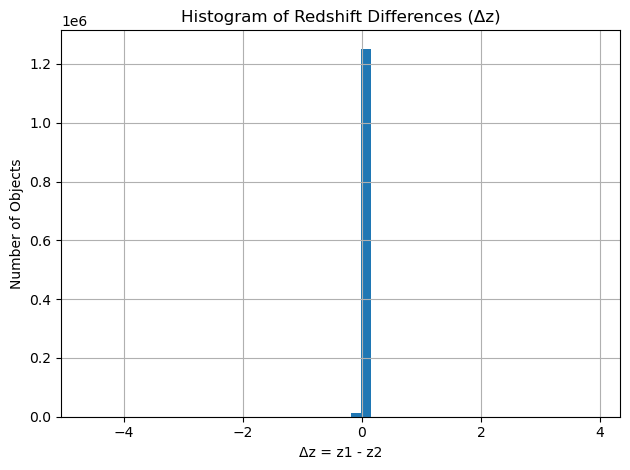

(-1.0, 1.0)

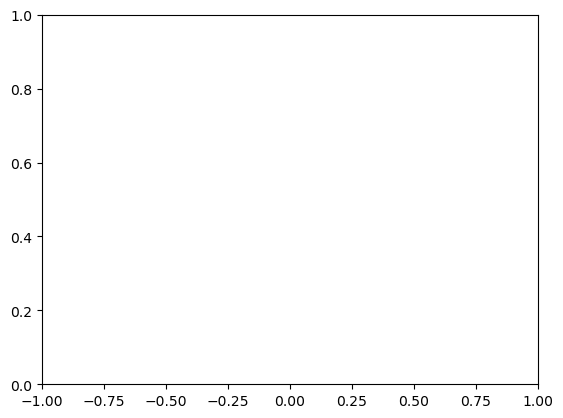

In [7]:
plt.hist(merged['delta_z'], bins=50)
plt.xlabel('Δz = z1 - z2')
plt.ylabel('Number of Objects')
plt.title('Histogram of Redshift Differences (Δz)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.xlim(-1, 1)

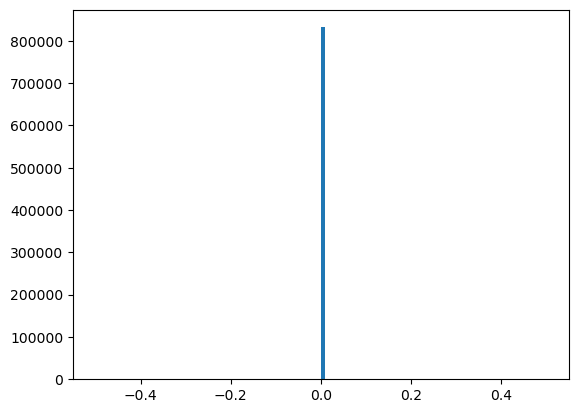

In [10]:
BI_mask = BALcat['BI_CIV'] <0.1
BI_CIVred = BALcat['BI_CIV'][BI_mask]
plt.hist(BI_CIVred,100)
plt.show()